# Clustering Methods

## Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math as math

from sklearn.metrics.pairwise import haversine_distances

from sklearn.cluster import OPTICS

## Importing Data

In [24]:
from google.colab import files
uploaded = files.upload()

Saving Undefined.csv to Undefined (1).csv


In [25]:
import io

df = pd.read_csv(io.StringIO(uploaded['Undefined.csv'].decode('utf-8')))

In [26]:
df

,Unnamed: 0,Date,Time,Latitude,Longitude,Depth,Magnitude,Year,Month,Country,Continent,MagGroup,DepthGroup,Tecto-setting,region
0,0,1965-01-02,0 days 13:44:18,19.2460,145.6160,131.60,6.000000,1965,1,Undefined,Undefined,0.0,Intermediate,Convergent,Philippine-Pacific
1,2,1965-01-05,0 days 18:05:58,-20.5790,-173.9720,20.00,6.200000,1965,1,Undefined,Undefined,1.0,Shallow,Convergent,Australian-Pacific
2,3,1965-01-08,0 days 18:49:43,-59.0760,-23.5570,15.00,5.800000,1965,1,Undefined,Undefined,0.0,Shallow,Divergent,SouthAmerican-African
3,4,1965-01-09,0 days 13:32:50,11.9380,126.4270,15.00,5.800000,1965,1,Undefined,Undefined,0.0,Shallow,Convergent,Philippine-Eurasian
4,7,1965-01-15,0 days 23:17:42,-13.3090,166.2120,35.00,6.000000,1965,1,Undefined,Undefined,0.0,Shallow,Convergent,Australian-Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12401,23207,2016-12-18,0 days 06:15:46,-34.9886,-107.8694,10.00,5.533333,2016,12,Undefined,Undefined,0.0,Shallow,Divergent,Nazca-Pacific
12402,23208,2016-12-18,0 days 06:39:42,-6.3046,154.3530,10.00,5.933333,2016,12,Undefined,Undefined,0.0,Shallow,Convergent,Australian-Pacific
12403,23217,2016-12-21,0 days 16:43:57,21.5036,145.4172,12.05,5.933333,2016,12,Undefined,Undefined,0.0,Shallow,Convergent,Philippine-Pacific
12404,23218,2016-12-24,0 days 01:32:16,-5.2453,153.5754,35.00,6.033333,2016,12,Undefined,Undefined,1.0,Shallow,Convergent,Australian-Pacific


In [27]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [28]:
df

,Date,Time,Latitude,Longitude,Depth,Magnitude,Year,Month,Country,Continent,MagGroup,DepthGroup,Tecto-setting,region
0,1965-01-02,0 days 13:44:18,19.2460,145.6160,131.60,6.000000,1965,1,Undefined,Undefined,0.0,Intermediate,Convergent,Philippine-Pacific
1,1965-01-05,0 days 18:05:58,-20.5790,-173.9720,20.00,6.200000,1965,1,Undefined,Undefined,1.0,Shallow,Convergent,Australian-Pacific
2,1965-01-08,0 days 18:49:43,-59.0760,-23.5570,15.00,5.800000,1965,1,Undefined,Undefined,0.0,Shallow,Divergent,SouthAmerican-African
3,1965-01-09,0 days 13:32:50,11.9380,126.4270,15.00,5.800000,1965,1,Undefined,Undefined,0.0,Shallow,Convergent,Philippine-Eurasian
4,1965-01-15,0 days 23:17:42,-13.3090,166.2120,35.00,6.000000,1965,1,Undefined,Undefined,0.0,Shallow,Convergent,Australian-Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12401,2016-12-18,0 days 06:15:46,-34.9886,-107.8694,10.00,5.533333,2016,12,Undefined,Undefined,0.0,Shallow,Divergent,Nazca-Pacific
12402,2016-12-18,0 days 06:39:42,-6.3046,154.3530,10.00,5.933333,2016,12,Undefined,Undefined,0.0,Shallow,Convergent,Australian-Pacific
12403,2016-12-21,0 days 16:43:57,21.5036,145.4172,12.05,5.933333,2016,12,Undefined,Undefined,0.0,Shallow,Convergent,Philippine-Pacific
12404,2016-12-24,0 days 01:32:16,-5.2453,153.5754,35.00,6.033333,2016,12,Undefined,Undefined,1.0,Shallow,Convergent,Australian-Pacific


## Extraction + Conversion

In [29]:
lat_lon = df[['Latitude', 'Longitude']]

In [30]:
lat_lon_radians = np.radians(lat_lon)

## Distance Matrix Calculation

In [31]:
distances = haversine_distances(lat_lon_radians, lat_lon_radians)

In [32]:
distances

array([[0.        , 0.97988772, 2.43305073, ..., 0.03953655, 0.4488029 ,
        0.32322043],
       [0.97988772, 0.        , 1.68791397, ..., 1.00937258, 0.61145258,
        1.24936127],
       [2.43305073, 1.68791397, 0.        , ..., 2.47148971, 2.01826328,
        2.72704424],
       ...,
       [0.03953655, 1.00937258, 2.47148971, ..., 0.        , 0.48727627,
        0.28392019],
       [0.4488029 , 0.61145258, 2.01826328, ..., 0.48727627, 0.        ,
        0.77011781],
       [0.32322043, 1.24936127, 2.72704424, ..., 0.28392019, 0.77011781,
        0.        ]])

## Clustering Process

In [33]:
optics_c = OPTICS(metric = 'precomputed', min_samples = 30, n_jobs = -1)

In [34]:
optics_c.fit(distances)

KeyboardInterrupt: ignored

In [ ]:
optics_c.labels_

array([ 0, 38, -1, ..., -1, -1, -1])

In [ ]:
y = pd.DataFrame(optics_c.labels_)

In [ ]:
y = pd.read_csv('OPTICS_results.csv')

In [ ]:
clustered = pd.concat([undefined,y], axis = 1)

In [ ]:
clustered

,index,Date,Time,Latitude,Longitude,Depth,Magnitude,Year,Month,Country,Continent,MagGroup,DepthGroup,Tecto-setting,region,0
0,0,1965-01-02,0 days 13:44:18,19.2460,145.6160,131.60,6.000000,1965,1,Undefined,Undefined,0.0,Intermediate,Convergent,Philippine-Pacific,0
1,2,1965-01-05,0 days 18:05:58,-20.5790,-173.9720,20.00,6.200000,1965,1,Undefined,Undefined,1.0,Shallow,Convergent,Australian-Pacific,38
2,3,1965-01-08,0 days 18:49:43,-59.0760,-23.5570,15.00,5.800000,1965,1,Undefined,Undefined,0.0,Shallow,Divergent,SouthAmerican-African,-1
3,4,1965-01-09,0 days 13:32:50,11.9380,126.4270,15.00,5.800000,1965,1,Undefined,Undefined,0.0,Shallow,Convergent,Philippine-Eurasian,-1
4,7,1965-01-15,0 days 23:17:42,-13.3090,166.2120,35.00,6.000000,1965,1,Undefined,Undefined,0.0,Shallow,Convergent,Australian-Pacific,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12401,23207,2016-12-18,0 days 06:15:46,-34.9886,-107.8694,10.00,5.533333,2016,12,Undefined,Undefined,0.0,Shallow,Divergent,Nazca-Pacific,-1
12402,23208,2016-12-18,0 days 06:39:42,-6.3046,154.3530,10.00,5.933333,2016,12,Undefined,Undefined,0.0,Shallow,Convergent,Australian-Pacific,-1
12403,23217,2016-12-21,0 days 16:43:57,21.5036,145.4172,12.05,5.933333,2016,12,Undefined,Undefined,0.0,Shallow,Convergent,Philippine-Pacific,-1
12404,23218,2016-12-24,0 days 01:32:16,-5.2453,153.5754,35.00,6.033333,2016,12,Undefined,Undefined,1.0,Shallow,Convergent,Australian-Pacific,-1


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
clustered.to_csv('clustered_delete.csv')
!cp clustered_delete.csv "drive/My Drive/"

In [ ]:
# DBSCAN

In [ ]:
# Optimization

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# 30 neighbours roughly - 2*dim of data

In [ ]:
neighbors = NearestNeighbors(n_neighbors=30)
neighbors_fit = neighbors.fit(lat_lon_radians)
distances, indices = neighbors_fit.kneighbors(lat_lon_radians)

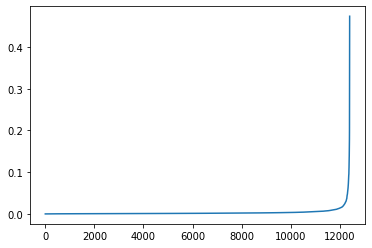

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

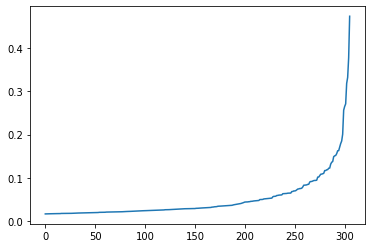

In [ ]:
plt.plot(distances[12100:])

In [ ]:
# min samples 30, epsilon 0.1

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
debscan = DBSCAN(eps = 0.1,min_samples = 30, metric = 'precomputed', n_jobs = -1)

In [ ]:
debscan.fit(distances)

DBSCAN(eps=0.1, metric='precomputed', min_samples=30, n_jobs=-1)

In [ ]:
A = pd.DataFrame(debscan.labels_)

In [ ]:
A

,0
0,0
1,1
2,2
3,0
4,1
...,...
12401,9
12402,1
12403,0
12404,1


In [ ]:
clustered2 = pd.concat([df,A], axis = 1)

In [ ]:
clustered2

,Date,Time,Latitude,Longitude,Depth,Magnitude,Year,Month,Country,Continent,MagGroup,DepthGroup,Tecto-setting,region,0
0,1965-01-02,0 days 13:44:18,19.2460,145.6160,131.60,6.000000,1965,1,Undefined,Undefined,0.0,Intermediate,Convergent,Philippine-Pacific,0
1,1965-01-05,0 days 18:05:58,-20.5790,-173.9720,20.00,6.200000,1965,1,Undefined,Undefined,1.0,Shallow,Convergent,Australian-Pacific,1
2,1965-01-08,0 days 18:49:43,-59.0760,-23.5570,15.00,5.800000,1965,1,Undefined,Undefined,0.0,Shallow,Divergent,SouthAmerican-African,2
3,1965-01-09,0 days 13:32:50,11.9380,126.4270,15.00,5.800000,1965,1,Undefined,Undefined,0.0,Shallow,Convergent,Philippine-Eurasian,0
4,1965-01-15,0 days 23:17:42,-13.3090,166.2120,35.00,6.000000,1965,1,Undefined,Undefined,0.0,Shallow,Convergent,Australian-Pacific,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12401,2016-12-18,0 days 06:15:46,-34.9886,-107.8694,10.00,5.533333,2016,12,Undefined,Undefined,0.0,Shallow,Divergent,Nazca-Pacific,9
12402,2016-12-18,0 days 06:39:42,-6.3046,154.3530,10.00,5.933333,2016,12,Undefined,Undefined,0.0,Shallow,Convergent,Australian-Pacific,1
12403,2016-12-21,0 days 16:43:57,21.5036,145.4172,12.05,5.933333,2016,12,Undefined,Undefined,0.0,Shallow,Convergent,Philippine-Pacific,0
12404,2016-12-24,0 days 01:32:16,-5.2453,153.5754,35.00,6.033333,2016,12,Undefined,Undefined,1.0,Shallow,Convergent,Australian-Pacific,1


In [ ]:
clustered2.to_csv('clustered__DBSCAN_OPT.csv')
!cp clustered__DBSCAN_OPT.csv "drive/My Drive/"

In [ ]:
A.value_counts()

 0     3967
 1     3904
 2      770
 3      675
 5      628
 7      587
 9      557
 4      380
-1      247
 8      125
 10     122
 15     113
 13      79
 12      69
 6       60
 14      55
 11      36
 16      32
dtype: int64

In [ ]:
debscan1 = DBSCAN(metric = 'precomputed', n_jobs = -1)

In [ ]:
debscan1.fit(distances)

DBSCAN(metric='precomputed', n_jobs=-1)

In [ ]:
B = pd.DataFrame(debscan1.labels_)

In [ ]:
B.value_counts()

 0    12403
-1        3
dtype: int64